# Introduction

# Data Preparation

In [22]:
# Read in the data
import pandas as pd
# use ISO-8859-1 encoding to properly convert characters that aren't
# in utf-8 encoding
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
# inspect the first 10 rows of the dataframe
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
# Review the column names of the dataframe
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Firstly, '**Have you seen any of the 6 films in the Star Wars franchise?**', and '**Do you consider yourself to be a fan of the Star Wars film franchise?**' columns are currently string types, with main values are 'Yes' and 'No'. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN.

In [3]:
# inspect 'Have you seen any of the 6 films in the Star Wars 
# franchise?' column
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [4]:
# inspect 'Do you consider yourself to be a fan of the Star Wars 
# film franchise?' column
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [5]:
# construct a dictionary that map 'yes' to True and 'no' to False
yes_no = {
    'Yes': True,
    'No': False
}
# Convert the 'Do you consider yourself to be a fan of the 
# Star Wars film franchise?' and 'Have you seen any of the 6 films 
# in the Star Wars franchise?' columns to the Boolean type.
cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?']

for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)
    
# inspect our changes
star_wars.iloc[:, [1,2]].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,True,True
1,False,NaN
2,True,False
3,True,True
4,True,True


It looks like that the next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question presented in the 4th column.

The columns for this question are:

* Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [6]:
import numpy as np
# construct dictionary to convert values from col 3:9 into boolean
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}
# convert values from col 3:9 into boolean
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

Rename each of the columns above so the names are more intuitive. We use seen_1 to indicate whether the respondent saw  Star Wars Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.

In [7]:
# Change the name of columns 3:9. 
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6"
})
# inspect our changes
star_wars.iloc[:,3:9].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:
* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [8]:
# convert column 9 up to 14 to the float data type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Give each column a more descriptive name. We use ranking_1 to indicate the ranking of the 1st episode, ranking_2 to indicate the ranking of the 2nd episode and so on

In [9]:
# Rename column 9 up to 14
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"    
})
# inspect our changes
star_wars.iloc[:, 9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


# Data Analysis

## Exploring Ranking

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# compute the average ranking of each episode
ranking_mean = star_wars.iloc[:, 9:15].mean()
ranking_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

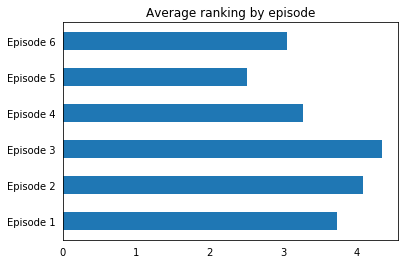

In [12]:
# Plot the results
ranking_columns = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4',
                  'Episode 5', 'Episode 6']
plt.barh(ranking_columns, ranking_mean, height = 0.5)
plt.title('Average ranking by episode')
plt.tick_params(axis = "x", bottom = False, top = False)
plt.tick_params(axis = "y", left = False, right = False)
plt.show()

In general, the audiences rank the original triology much higher than the second triology (Remember in our case, the smaller the rating the better).

Amongst the 3 movies of the original triology, the audiences seems to enjoy the Episode 5 the most.

## View Counts

In [14]:
# tally the number of people that have seen each episode
total_seen = star_wars.iloc[:, 3:9].sum()
total_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

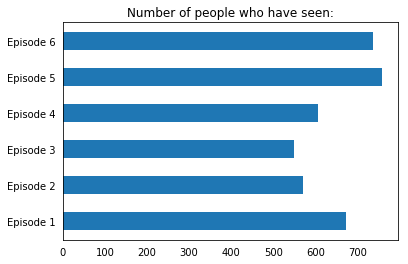

In [15]:
# Plot the results
plt.barh(ranking_columns, total_seen, height = 0.5)
plt.title('Number of people who have seen:')
plt.tick_params(axis = "x", bottom = False, top = False)
plt.tick_params(axis = "y", left = False, right = False)
plt.show()

Episode 5 have the most amount of people who have seen it. Episode 6 comes in close second. In general more people have seen the original triology than the second triology. 

Amongst the 3 movies in the second triology, Episode 1 has the most amount of people who have seen it, there are even more people who have seen Episode 1 than there are Episode 4. This is quite understandable as people are excited for the second triology after the sucess of the original's.

## Exploring the Data by Genders

In [16]:
# Split the data into two groups: Male and Female
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

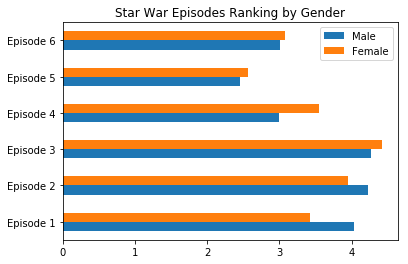

In [19]:
# compute the average ranking of each episode by male audiences
ranking_mean_males = males.iloc[:, 9:15].mean()
# compute the average ranking of each episode by female audiences
ranking_mean_females = females.iloc[:, 9:15].mean()
# combine male ranking and female ranking into a new dataframe
males_vs_females_ranking = pd.concat([ranking_mean_males, ranking_mean_females], axis=1)
males_vs_females_ranking = males_vs_females_ranking.rename({0:'Male', 1:'Female'}, axis = 1)
males_vs_females_ranking.index = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']
# plot the result
males_vs_females_ranking.plot.barh(title = 'Star War Episodes Ranking by Gender')

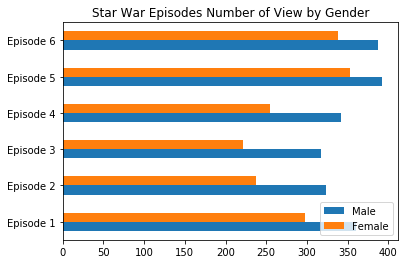

In [20]:
# count the number of view of each episode by male audiences
view_males = males.iloc[:, 3:9].sum()
# count the number of view of each episode by female audiences
view_females = females.iloc[:, 3:9].sum()
# combine male  and female data into a new dataframe
males_vs_females_view = pd.concat([view_males, view_females], axis=1)
males_vs_females_view = males_vs_females_view.rename({0:'Male', 1:'Female'}, axis = 1)
males_vs_females_view.index = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']
# plot the result
males_vs_females_view.plot.barh(title = 'Star War Episodes Number of View by Gender')

In general:
* there the Star War franchise enjoy more male viewership than female viewership.
* There is no significant different in the ranking trend amongst each Star War movies between male and female audiences.